<a href="https://colab.research.google.com/github/ksushrut/CoinClassifier/blob/main/Models_SushrutPhase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
from torchvision import transforms
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp -r "/content/drive/My Drive/CoinImages/PreprocessedCoinImages" /content/

In [4]:
csv_loc='https://raw.githubusercontent.com/ksushrut/CoinClassifier/refs/heads/main/processed_data.csv'

In [5]:
df=pd.read_csv(csv_loc)
df

,URL,image name,country,width,height,label
0,/content/drive/My Drive/CoinImages/Preprocesse...,14t.jpg,Australia,224,224,AUD 50 Cents
1,/content/drive/My Drive/CoinImages/Preprocesse...,10t.jpg,Australia,224,224,AUD 50 Cents
2,/content/drive/My Drive/CoinImages/Preprocesse...,13t.jpg,Australia,224,224,AUD 50 Cents
3,/content/drive/My Drive/CoinImages/Preprocesse...,3h.jpg,Australia,224,224,AUD 50 Cents
4,/content/drive/My Drive/CoinImages/Preprocesse...,2h.jpg,Australia,224,224,AUD 50 Cents
...,...,...,...,...,...,...
2418,/content/drive/My Drive/CoinImages/Preprocesse...,4h.jpeg,India,224,224,INR 10Rs
2419,/content/drive/My Drive/CoinImages/Preprocesse...,24h.jpeg,India,224,224,INR 10Rs
2420,/content/drive/My Drive/CoinImages/Preprocesse...,11t.jpeg,India,224,224,INR 10Rs
2421,/content/drive/My Drive/CoinImages/Preprocesse...,3h.jpeg,India,224,224,INR 10Rs


In [6]:
label_encoder = LabelEncoder()
df['encoded_class'] = label_encoder.fit_transform(df['label'])

In [7]:
df['URL'] = df['URL'].str.replace("/content/drive/My Drive/CoinImages/Preprocessed_Images",
                                  "/content/PreprocessedCoinImages")

In [8]:
df

,URL,image name,country,width,height,label,encoded_class
0,/content/drive/My Drive/CoinImages/Preprocesse...,14t.jpg,Australia,224,224,AUD 50 Cents,23
1,/content/drive/My Drive/CoinImages/Preprocesse...,10t.jpg,Australia,224,224,AUD 50 Cents,23
2,/content/drive/My Drive/CoinImages/Preprocesse...,13t.jpg,Australia,224,224,AUD 50 Cents,23
3,/content/drive/My Drive/CoinImages/Preprocesse...,3h.jpg,Australia,224,224,AUD 50 Cents,23
4,/content/drive/My Drive/CoinImages/Preprocesse...,2h.jpg,Australia,224,224,AUD 50 Cents,23
...,...,...,...,...,...,...,...
2418,/content/drive/My Drive/CoinImages/Preprocesse...,4h.jpeg,India,224,224,INR 10Rs,32
2419,/content/drive/My Drive/CoinImages/Preprocesse...,24h.jpeg,India,224,224,INR 10Rs,32
2420,/content/drive/My Drive/CoinImages/Preprocesse...,11t.jpeg,India,224,224,INR 10Rs,32
2421,/content/drive/My Drive/CoinImages/Preprocesse...,3h.jpeg,India,224,224,INR 10Rs,32


In [9]:
df_sushrut = df[(df['country'] == 'India') | (df['country'] == 'United States')].reset_index(drop=True)

In [10]:
class CoinImageDataset(Dataset):
    def __init__(self, dataframe,transform=None):
        self.dataframe = dataframe.reset_index(drop=True)
        self.transform=transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_folder = row['URL']
        img_name = str(row['image name']).strip()
        img_path = img_folder +'/'+ img_name
        label = row['encoded_class']

        image = Image.open(img_path).convert("RGB")
        image = torch.tensor(np.array(image)).permute(2, 0, 1).float() / 255.0
        return image, label

In [11]:
train_df, val_test_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df['encoded_class'])
val_df, test_df = train_test_split(val_test_df, test_size=0.75,
random_state=42, stratify=val_test_df['encoded_class'])

train_dataset = CoinImageDataset(train_df)
val_dataset = CoinImageDataset(val_df)
test_dataset = CoinImageDataset(test_df)


train_loader = DataLoader(train_dataset, batch_size=32,
shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [14]:
sushruttrain_df, sushrutval_test_df = train_test_split(df_sushrut, test_size=0.4, random_state=42, stratify=df_sushrut['encoded_class'])
sushrutval_df, sushruttest_df = train_test_split(sushrutval_test_df, test_size=0.75,
random_state=42, stratify=sushrutval_test_df['encoded_class'])

train_dataset = CoinImageDataset(train_df)
val_dataset = CoinImageDataset(val_df)
test_dataset = CoinImageDataset(test_df)


sushrut_train_loader = DataLoader(train_dataset, batch_size=32,
shuffle=True)
sushrut_val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
sushrut_test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
def validate_model(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss /= total
    val_acc = 100 * correct / total
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%\n")
    model.train()

In [16]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device,scheduler, num_epochs=10):
    lrs=[]
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        print(f"Epoch {epoch+1}/{num_epochs}")

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = 100 * correct / total
        print(f"Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.2f}%")
        validate_model(model, val_loader, criterion, device)
        scheduler.step()
        lrs.append(optimizer.param_groups[0]['lr'])
        return lrs

In [17]:
def test_model(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():

        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_loss /= total
    test_acc = 100 * correct / total
    print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%")

# AlexNet FineTuning

In [27]:
import torch
import torch.nn as nn
from torchvision import models

class AlexNetFineTuner(nn.Module):
    def __init__(self, num_classes):
        super(AlexNetFineTuner, self).__init__()
        self.alexnet = models.alexnet(pretrained=True)

        for idx in [1, 3]:
            for param in self.alexnet.classifier[idx].parameters():
                param.requires_grad = False

        # Replace the final classifier layer
        self.alexnet.classifier[6] = nn.Linear(self.alexnet.classifier[6].in_features, num_classes)

    def forward(self, x):
        return self.alexnet(x)

In [28]:
num_classes = df['encoded_class'].nunique()
print("Number of classes",num_classes)
alex_finetunemodel = AlexNetFineTuner(num_classes=num_classes)
print(alex_finetunemodel)

Number of classes 48


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNetFineTuner(
  (alexnet): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=False

In [29]:
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
alex_finetunemodel.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alex_finetunemodel.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=1, gamma=0.5)

lrs=train_model(alex_finetunemodel, train_loader, val_loader, criterion, optimizer, device,scheduler)
print(lrs)
# Save the model after training
torch.save(alex_finetunemodel.state_dict(), 'alex_finetunemodel.pth')
print("Model saved as 'alex_finetunemodel.pth'")

Epoch 1/10
Train Loss: 3.9237 | Train Acc: 1.65%
Val Loss: 3.8757 | Val Acc: 2.07%

Epoch 2/10
Train Loss: 3.8806 | Train Acc: 1.17%
Val Loss: 3.8715 | Val Acc: 2.07%

Epoch 3/10
Train Loss: 3.8735 | Train Acc: 1.93%
Val Loss: 3.8711 | Val Acc: 2.48%

Epoch 4/10
Train Loss: 3.8726 | Train Acc: 2.06%
Val Loss: 3.8710 | Val Acc: 2.48%

Epoch 5/10
Train Loss: 3.8719 | Train Acc: 2.41%
Val Loss: 3.8710 | Val Acc: 2.48%

Epoch 6/10
Train Loss: 3.8714 | Train Acc: 2.41%
Val Loss: 3.8710 | Val Acc: 2.48%

Epoch 7/10
Train Loss: 3.8714 | Train Acc: 2.41%
Val Loss: 3.8710 | Val Acc: 2.48%

Epoch 8/10
Train Loss: 3.8712 | Train Acc: 2.41%
Val Loss: 3.8710 | Val Acc: 2.48%

Epoch 9/10
Train Loss: 3.8709 | Train Acc: 2.41%
Val Loss: 3.8710 | Val Acc: 2.48%

Epoch 10/10
Train Loss: 3.8710 | Train Acc: 2.41%
Val Loss: 3.8710 | Val Acc: 2.48%

Model saved to customcnn_model.pth
None
Model saved as 'alex_finetunemodel.pth'


None


ValueError: x, y, and format string must not be None

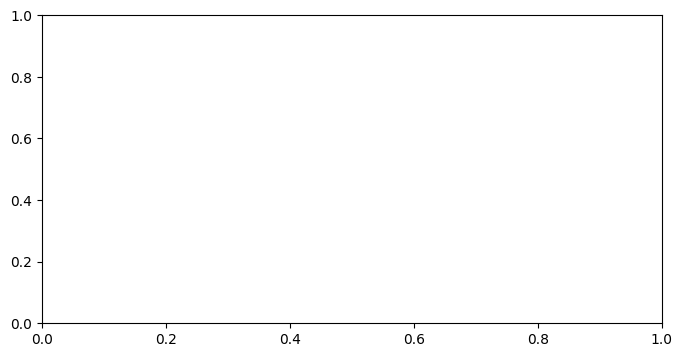

In [25]:
print(lrs)
plt.figure(figsize=(8, 4))
plt.plot(range(1,11), lrs, marker='o')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
alex_finetunemodel.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alex_finetunemodel.parameters(), lr=1e-4)
alex_finetunemodel.eval()  # Set the model to evaluation mode
test_model(alex_finetunemodel, test_loader, criterion, device)

KeyboardInterrupt: 

# VCG FineTuning

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class PretrainedVGG16(nn.Module):
    def __init__(self, num_classes,freeze_features=True):
        super(PretrainedVGG16, self).__init__()
        self.vgg = models.vgg16(pretrained=True)

        for idx in [1,2,3,4,5]:
            for param in self.vgg.classifier[idx].parameters():
                param.requires_grad = False

        self.vgg.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        return self.vgg(x)

In [ ]:
num_classes = df['encoded_class'].nunique()
print("Number of classes",num_classes)
vgg_model = PretrainedVGG16(num_classes=num_classes)
print(vgg_model)

Number of classes 48
PretrainedVGG16(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU

In [ ]:
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs=10
acc_list_vgg=[]
loss_vgg=[]
for epoch in range(10):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    acc_list_vgg.append(accuracy)
    loss_vgg.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Save the model after training
torch.save(model.state_dict(), 'vgg.pth')
print("Model saved as 'vgg.pth'")

Epoch [1/10], Loss: 0.2123, Accuracy: 93.32%
Epoch [2/10], Loss: 0.1406, Accuracy: 95.46%
Epoch [3/10], Loss: 0.1413, Accuracy: 95.39%
Epoch [4/10], Loss: 0.1264, Accuracy: 95.87%
Epoch [5/10], Loss: 0.0938, Accuracy: 97.45%
Epoch [6/10], Loss: 0.1193, Accuracy: 96.42%
Epoch [7/10], Loss: 0.0860, Accuracy: 96.97%
Epoch [8/10], Loss: 0.0776, Accuracy: 97.73%
Epoch [9/10], Loss: 0.0562, Accuracy: 98.55%
Epoch [10/10], Loss: 0.0486, Accuracy: 98.49%
Model saved as 'vgg.pth'


In [ ]:
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in sushrut_val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
val_acc_alexnet=100 * correct / total
print(f"Validation Accuracy: {val_acc_alexnet:.2f}%")


model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in sushrut_test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_acc_alexnet=100 * correct / total
print(f"Test Accuracy: {test_acc_alexnet:.2f}%")

Validation Accuracy: 70.66%
Test Accuracy: 73.63%


# Augmentation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),                         # Resize to standard input size
    transforms.RandomHorizontalFlip(p=0.2),                # Mild flipping
    transforms.RandomRotation(degrees=5),                  # Small rotation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4785, 0.5099, 0.5338],
                         std=[0.2261, 0.2196, 0.2504])
])

In [ ]:
train_dataset = CoinImageDataset(train_df, transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
model = AlexNetFineTuner(num_classes=num_classes)
print(model)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNetFineTuner(
  (alexnet): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=False

In [ ]:
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs=10
acc_list_alexnet=[]
loss_alexnet=[]
for epoch in range(10):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    acc_list_alexnet.append(accuracy)
    loss_alexnet.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Save the model after training
torch.save(model.state_dict(), 'alexnet_model.pth')
print("Model saved as 'alexnet_model.pth'")

Epoch [1/10], Loss: 3.8355, Accuracy: 5.30%
Epoch [2/10], Loss: 3.0789, Accuracy: 22.51%
Epoch [3/10], Loss: 2.0356, Accuracy: 45.01%
Epoch [4/10], Loss: 1.4118, Accuracy: 59.12%
Epoch [5/10], Loss: 0.9854, Accuracy: 70.75%
Epoch [6/10], Loss: 0.7471, Accuracy: 78.94%
Epoch [7/10], Loss: 0.5221, Accuracy: 84.79%
Epoch [8/10], Loss: 0.4193, Accuracy: 87.82%
Epoch [9/10], Loss: 0.3575, Accuracy: 88.99%
Epoch [10/10], Loss: 0.2269, Accuracy: 92.77%
Model saved as 'alexnet_model.pth'


In [ ]:
num_classes = df['encoded_class'].nunique()
print("Number of classes",num_classes)
vgg_model = PretrainedVGG16(num_classes=num_classes)
print(vgg_model)

Number of classes 48


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


PretrainedVGG16(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      

In [ ]:
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs=10
acc_list_vgg=[]
loss_vgg=[]
for epoch in range(10):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    acc_list_vgg.append(accuracy)
    loss_vgg.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Save the model after training
torch.save(model.state_dict(), 'vgg.pth')
print("Model saved as 'vgg.pth'")

Epoch [1/10], Loss: 0.2852, Accuracy: 90.64%
Epoch [2/10], Loss: 0.2206, Accuracy: 93.26%
Epoch [3/10], Loss: 0.1414, Accuracy: 95.87%
Epoch [4/10], Loss: 0.1366, Accuracy: 96.01%
Epoch [5/10], Loss: 0.1112, Accuracy: 97.38%
Epoch [6/10], Loss: 0.0949, Accuracy: 97.18%
Epoch [7/10], Loss: 0.1207, Accuracy: 96.77%
Epoch [8/10], Loss: 0.0919, Accuracy: 97.25%
Epoch [9/10], Loss: 0.0905, Accuracy: 97.45%
Epoch [10/10], Loss: 0.0722, Accuracy: 97.73%
Model saved as 'vgg.pth'


In [ ]:
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in sushrut_val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
val_acc_alexnet=100 * correct / total
print(f"Validation Accuracy: {val_acc_alexnet:.2f}%")


model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in sushrut_test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_acc_alexnet=100 * correct / total
print(f"Test Accuracy: {test_acc_alexnet:.2f}%")

Validation Accuracy: 69.83%
Test Accuracy: 71.02%


In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(10), lrs, marker='o')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()